In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from EVO.CPG.revde_optimizer import (DbRevDEOptimizerIndividual,
                             DbRevDEOptimizerIndividual)
from revolve2.core.database import open_database_sqlite
from sqlalchemy.future import select
import numpy as np

In [25]:
morphologies = ['spider', 'gecko', 'babya','salamander','blokky','babyb','garrix','insect','linkin','longleg','penguin',
                'pentapod','queen','squarish','snake','stingray','tinlicker','turtle','ww','zappa']

In [37]:
ppo_data = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO_580/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data.append(body_data)

In [11]:
evo_df = pd.read_csv('data/summary.csv')

In [16]:
evo_df.shape

(58000, 7)

In [33]:
a = evo_df[evo_df['robot'] == body][evo_df['run']==1]
a.shape
b = a[a['run'] == 1]
b.shape

/tmp/ipykernel_8471/1686283290.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = evo_df[evo_df['robot'] == body][evo_df['run']==1]


(580, 7)

In [34]:
evo_data = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        data = evo_df[evo_df['robot'] == body][evo_df['run'] == n]
        body_data.append(data)
    evo_data.append(body_data)

/tmp/ipykernel_8471/630631251.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = evo_df[evo_df['robot'] == body][evo_df['run'] == n]


In [35]:
def single_body_analysis(data):
    max_values = np.zeros(shape=len(data))
    for i, df in enumerate(data):
        df_max = df['fitness'].max()
        max_values[i] = df_max
    print('Maximum fitness: ' + str(np.max(max_values)))
    print('Average maximum fitness: ' + str(np.mean(max_values)))
    print('Variance of max values: ' + str(np.var(max_values)))

def plot_compare(algo_data, labels):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(algo_data)))
    fig, ax = plt.subplots()
    for idx, data in enumerate(algo_data):
        d = np.zeros((len(data), len(data[0])))
        for i, run_data in enumerate(data):
            d[i] = np.array(run_data['fitness'])
        mean = np.mean(d, axis=0)
        variance = np.std(d, axis=0)
        ax.plot(mean, color=colors[idx], label=labels[idx])
        ax.fill_between(range(1, len(mean) + 1), mean-variance, mean+variance, color=colors[idx], alpha=0.1)
        plt.legend()
    plt.show()

Morphology: spider
Statistics for RevDe:
Maximum fitness: 4.67308055544306
Average maximum fitness: 2.316846444894144
Variance of max values: 1.4002700753903474
Statistics for PPO:
Maximum fitness: 4.927887902387106
Average maximum fitness: 4.511441927516349
Variance of max values: 0.0690493088441563


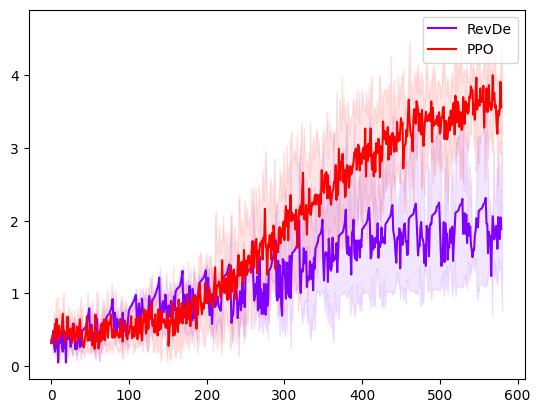


Morphology: gecko
Statistics for RevDe:
Maximum fitness: 3.02630604051048
Average maximum fitness: 2.395293183304868
Variance of max values: 0.17181570329480553
Statistics for PPO:
Maximum fitness: 7.254644282037949
Average maximum fitness: 6.4008616353255166
Variance of max values: 0.21155417667177998


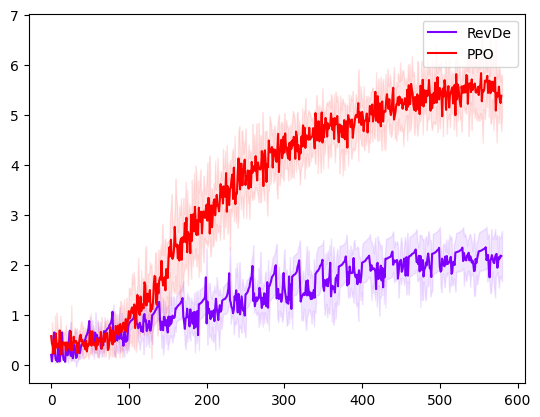


Morphology: babya
Statistics for RevDe:
Maximum fitness: 2.4781532009405365
Average maximum fitness: 2.1299119713097108
Variance of max values: 0.09942821811466647
Statistics for PPO:
Maximum fitness: 5.599302033124678
Average maximum fitness: 4.4187828990070255
Variance of max values: 0.8035093567610796


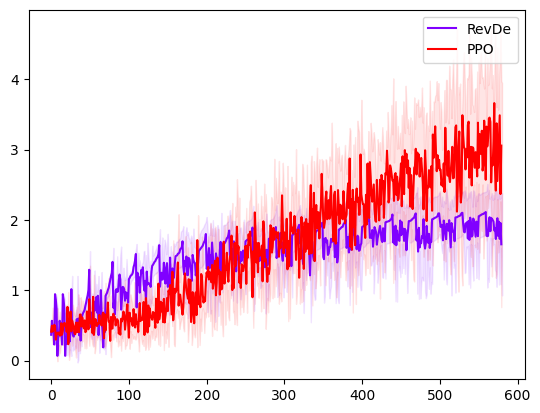


Morphology: salamander
Statistics for RevDe:
Maximum fitness: 3.0982658116180906
Average maximum fitness: 2.754960371078854
Variance of max values: 0.044505374013017206
Statistics for PPO:
Maximum fitness: 5.541512033464571
Average maximum fitness: 4.715558466640801
Variance of max values: 0.23168936526647377


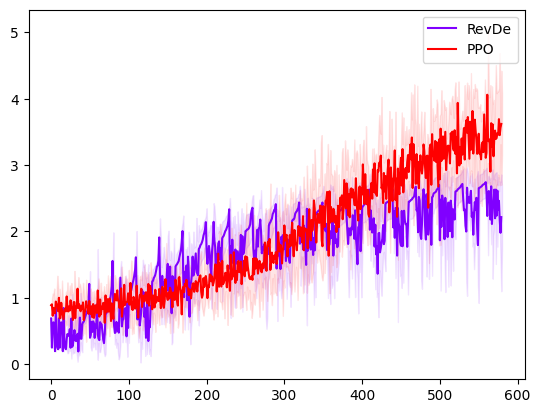


Morphology: blokky
Statistics for RevDe:
Maximum fitness: 1.8407752588852075
Average maximum fitness: 1.768020879763209
Variance of max values: 0.0033300634320065324
Statistics for PPO:
Maximum fitness: 6.86680341674391
Average maximum fitness: 6.579345054886417
Variance of max values: 0.05590768742419834


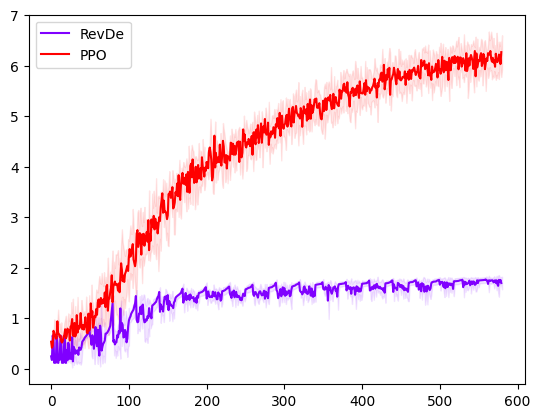


Morphology: babyb
Statistics for RevDe:
Maximum fitness: 3.659675786938908
Average maximum fitness: 2.919693683242624
Variance of max values: 0.3102024453983619
Statistics for PPO:
Maximum fitness: 4.115141495859461
Average maximum fitness: 3.8725859828682117
Variance of max values: 0.038010411564894306


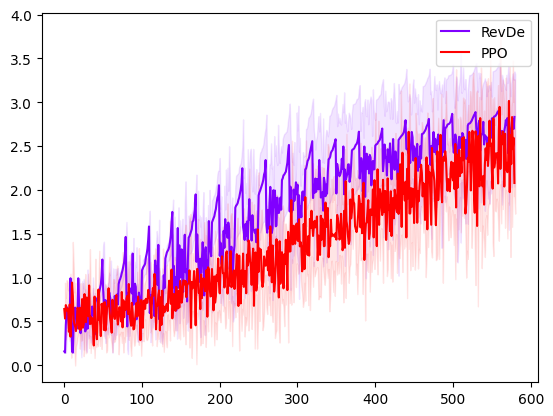


Morphology: garrix
Statistics for RevDe:
Maximum fitness: 2.392907816443695
Average maximum fitness: 2.1194307132345105
Variance of max values: 0.04433735107039034
Statistics for PPO:
Maximum fitness: 3.515141344163148
Average maximum fitness: 3.280836614951108
Variance of max values: 0.046987087581816446


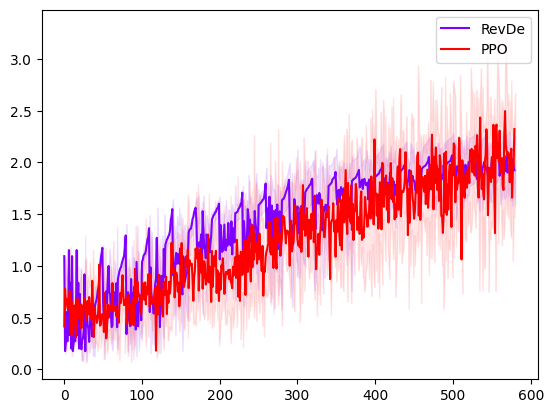


Morphology: insect
Statistics for RevDe:
Maximum fitness: 2.4168867012370656
Average maximum fitness: 2.144013179975699
Variance of max values: 0.06623105416181886
Statistics for PPO:
Maximum fitness: 6.266894916977118
Average maximum fitness: 5.93884297662604
Variance of max values: 0.03292862305582379


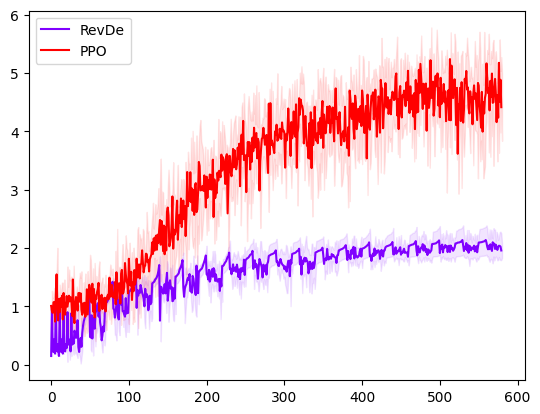


Morphology: linkin
Statistics for RevDe:
Maximum fitness: 3.304591851961052
Average maximum fitness: 2.9927120916067578
Variance of max values: 0.06557701801193273
Statistics for PPO:
Maximum fitness: 4.85257005743388
Average maximum fitness: 3.7537480059806763
Variance of max values: 0.6836826367396203


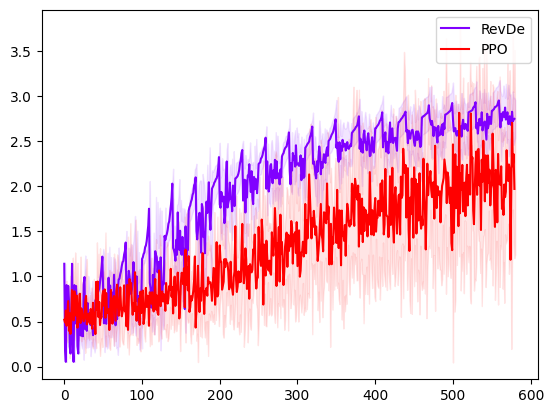


Morphology: longleg
Statistics for RevDe:
Maximum fitness: 4.30347420944309
Average maximum fitness: 3.6879076257996317
Variance of max values: 0.475234271350891
Statistics for PPO:
Maximum fitness: 4.636872868221484
Average maximum fitness: 4.082074183894663
Variance of max values: 0.08863637094939399


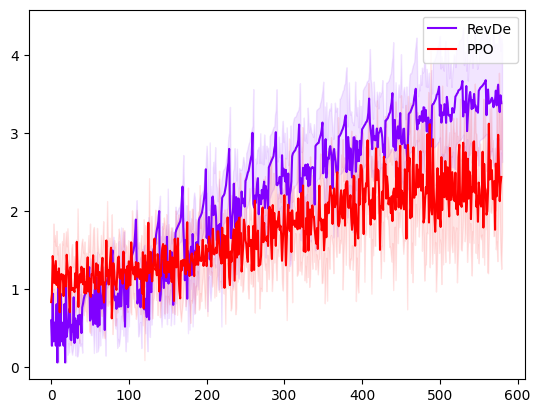


Morphology: penguin
Statistics for RevDe:
Maximum fitness: 4.908523300753692
Average maximum fitness: 4.285303924234275
Variance of max values: 0.11794216250225739
Statistics for PPO:
Maximum fitness: 7.324748987411776
Average maximum fitness: 6.771952474580665
Variance of max values: 0.10089117994552761


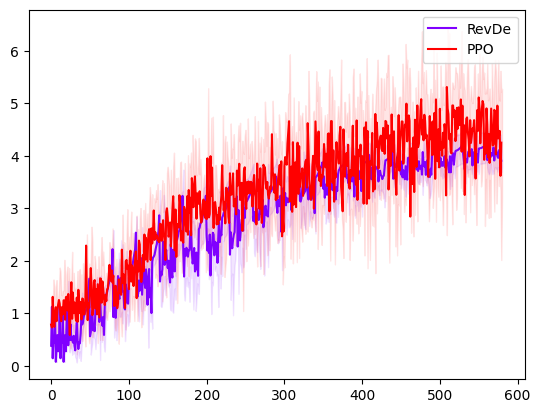


Morphology: pentapod
Statistics for RevDe:
Maximum fitness: 4.274344139688401
Average maximum fitness: 4.087718060021736
Variance of max values: 0.021349785241075177
Statistics for PPO:
Maximum fitness: 5.539654487417831
Average maximum fitness: 5.280613901802185
Variance of max values: 0.030711139350735495


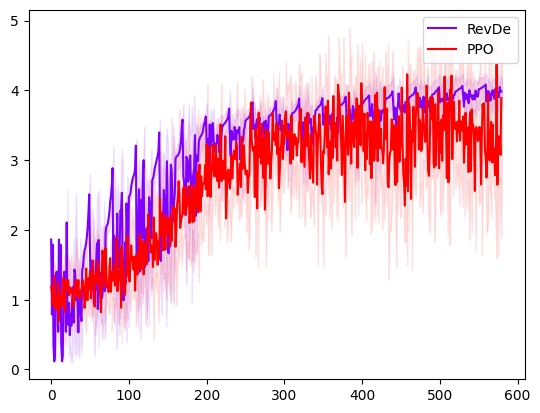


Morphology: queen
Statistics for RevDe:
Maximum fitness: 2.444459092983485
Average maximum fitness: 1.8945398851676472
Variance of max values: 0.1155784975469973
Statistics for PPO:
Maximum fitness: 3.15570015908303
Average maximum fitness: 2.451360962888356
Variance of max values: 0.3440608986560595


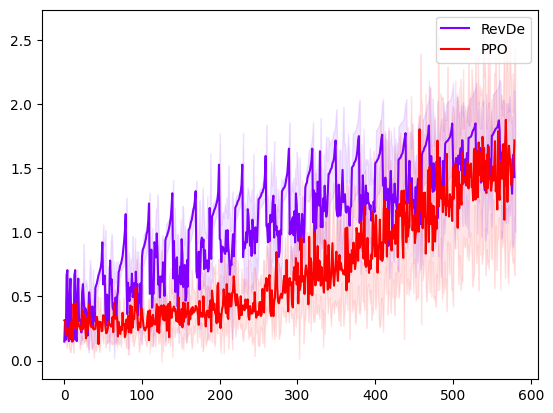


Morphology: squarish
Statistics for RevDe:
Maximum fitness: 1.096024610542476
Average maximum fitness: 1.0079344516424813
Variance of max values: 0.0076486090283903515
Statistics for PPO:
Maximum fitness: 5.917072925251857
Average maximum fitness: 5.290030885034813
Variance of max values: 0.17910844742267387


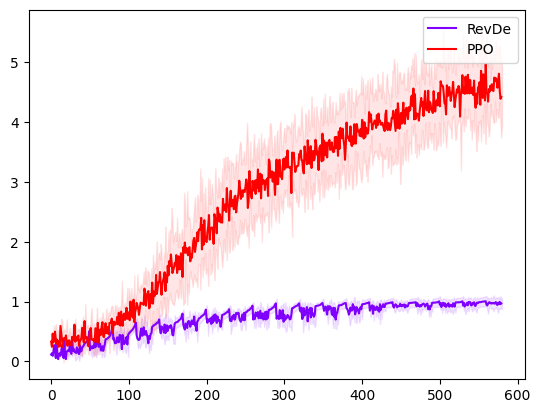


Morphology: snake
Statistics for RevDe:
Maximum fitness: 4.18577891175515
Average maximum fitness: 3.9102164078117894
Variance of max values: 0.0364863363645395
Statistics for PPO:
Maximum fitness: 3.839092247911623
Average maximum fitness: 3.3661139602476053
Variance of max values: 0.12213531133302771


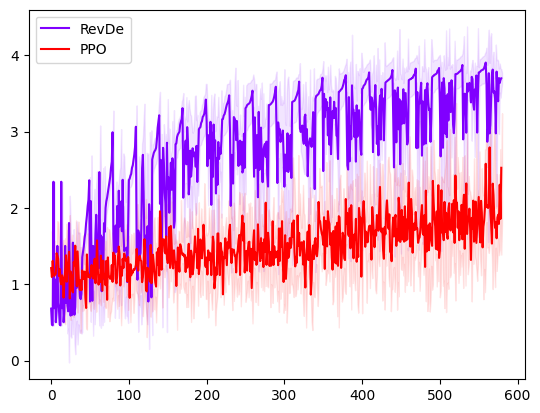


Morphology: stingray
Statistics for RevDe:
Maximum fitness: 2.3882086630250123
Average maximum fitness: 1.9187513699516114
Variance of max values: 0.11554912619735266
Statistics for PPO:
Maximum fitness: 5.533270691032657
Average maximum fitness: 5.217308258640404
Variance of max values: 0.0833012377673918


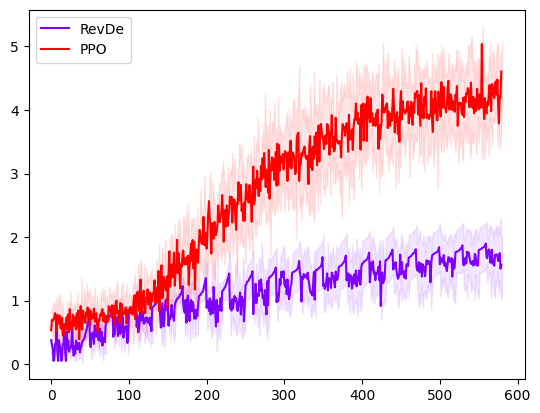


Morphology: tinlicker
Statistics for RevDe:
Maximum fitness: 3.8208942245134776
Average maximum fitness: 3.442123178361592
Variance of max values: 0.0710468376599788
Statistics for PPO:
Maximum fitness: 5.733811604251739
Average maximum fitness: 5.59713909987041
Variance of max values: 0.038485955193071505


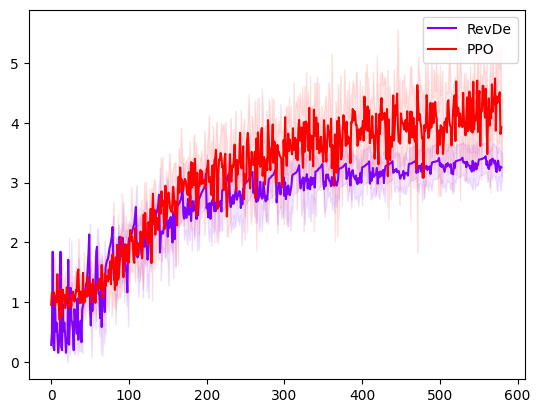


Morphology: turtle
Statistics for RevDe:
Maximum fitness: 2.139616522971574
Average maximum fitness: 1.9375330030253786
Variance of max values: 0.026732696704255883
Statistics for PPO:
Maximum fitness: 4.496512620929082
Average maximum fitness: 4.014144285372252
Variance of max values: 0.14300250673749856


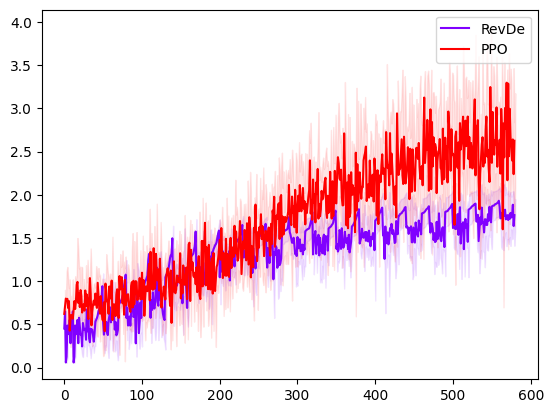


Morphology: ww
Statistics for RevDe:
Maximum fitness: 2.9598688666233706
Average maximum fitness: 2.4894318723028745
Variance of max values: 0.12280741493086585
Statistics for PPO:
Maximum fitness: 5.86608813152986
Average maximum fitness: 5.77494754120781
Variance of max values: 0.004352171696530375


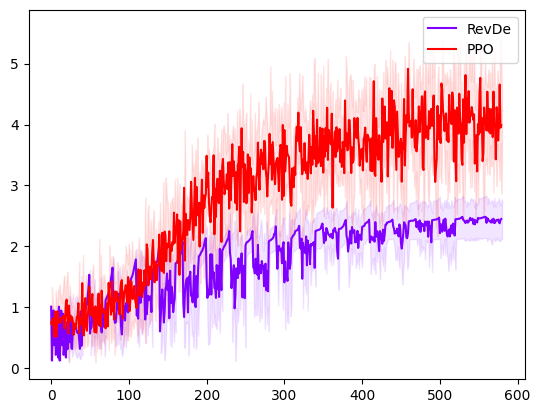


Morphology: zappa
Statistics for RevDe:
Maximum fitness: 3.7284165939421934
Average maximum fitness: 3.4716026195918324
Variance of max values: 0.04500598153761885
Statistics for PPO:
Maximum fitness: 5.257029003488943
Average maximum fitness: 4.713792148830103
Variance of max values: 0.10599842440939297


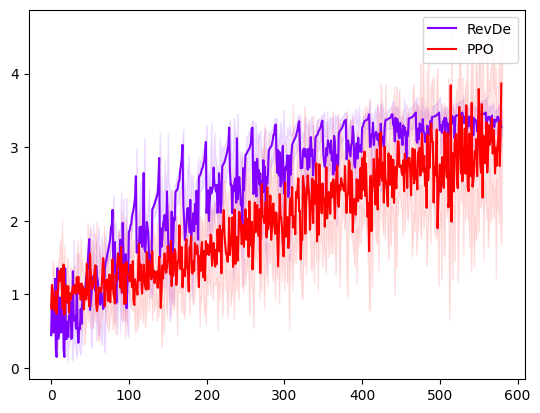

In [38]:
for i, body in enumerate(morphologies):
    print('Morphology: ' + body)
    print('Statistics for RevDe:')
    single_body_analysis(evo_data[i])
    print('Statistics for PPO:')
    single_body_analysis(ppo_data[i])
    plot_compare([evo_data[i], ppo_data[i]], labels=['RevDe', 'PPO'])
    print()
    